In [ ]:
#Analisi Diffusione COVID-19 
#Il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo; 
#a tal fine, richiede di utilizzare il dataset, curato da Our World in Data, all'indirizzo 
#https://github.com/owid/covid-19-data/tree/master/public/data 
#alla voce " Download ourcomplete COVID-19 dataset" scaricare il dataset nel formato che si preferisce. 
#1. Si richiede di verificare le dimensioni del dataset e i relativi metadati
#2. Si chiede di trovare, per ogni continente:
#	a. il numero di casi fin dall'inizio della pandemia
#	b. la percentuale rispetto al totale mondiale del numero di casi
#3. Selezionare i dati relativi all'Italia nel 2022 e mostrare con dei grafici adeguati:
#	a. l'evoluzione del casi totali dall'inizio alla fine dell'anno
#	b. il numero di nuovi casi rispetto alla data
#		k. poiché i nuovi casi vengono registrati settimanalmente, filtrare via i dati che non hanno misurazioni
#	
#
#4. Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti 
#   in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso)
#	a. scrivere un breve commento a riguardo
#   
#   
#5. Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023: 
#	a. mostrare la somma dei pazienti ospitalizzati per ognuna 
#	b. se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno

In [2]:
# Importazione del dataset

import pandas as pd
import matplotlib.pyplot as plt
import datetime

percorso="C:/Users/massi/OneDrive/Documenti/CORSO_DATA_ANALYST/PHYTON/DataSet/owid-covid-data.csv"
df = pd.read_csv(percorso)
df['date']=pd.to_datetime(df['date'])
pd.options.display.float_format = '{:,.2f}'.format
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.00,0.00,NaN,0.00,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.00,0.00,NaN,0.00,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.00,0.00,NaN,0.00,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.00,0.00,NaN,0.00,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.00,0.00,NaN,0.00,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,"266,386.00",0.00,0.00,"5,740.00",0.00,0.00,...,30.70,36.79,1.70,61.49,0.57,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,"266,386.00",0.00,0.00,"5,740.00",0.00,0.00,...,30.70,36.79,1.70,61.49,0.57,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,"266,386.00",0.00,0.00,"5,740.00",0.00,0.00,...,30.70,36.79,1.70,61.49,0.57,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,"266,386.00",0.00,0.00,"5,740.00",0.00,0.00,...,30.70,36.79,1.70,61.49,0.57,16320539,NaN,NaN,NaN,NaN


In [3]:
# 1. Verificare le dimensioni del dataset e i relativi metadati

print("Dimensioni del dataset:", df.shape)
print("Metadati del dataset:\n", df.info())


Dimensioni del dataset: (429435, 67)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    429435 non-null  object        
 1   continent                                   402910 non-null  object        
 2   location                                    429435 non-null  object        
 3   date                                        429435 non-null  datetime64[ns]
 4   total_cases                                 411804 non-null  float64       
 5   new_cases                                   410159 non-null  float64       
 6   new_cases_smoothed                          408929 non-null  float64       
 7   total_deaths                                411804 non-null  float64       
 8   new_deaths                           

In [5]:
# a. Numero di casi fin dall'inizio della pandemia

# calcolo dei casi per singolo continente:

CasiContinente = df.groupby('continent')['new_cases'].sum().dropna()


# b. Percentuale rispetto al totale mondiale del numero di casi
# calcolo percentuali rispetto al totale globale

TotaleCasiMondo = CasiContinente.sum()
PercentualeCasiContinente = (CasiContinente / TotaleCasiMondo) * 100



#Creazione di un dataframe riepilogativo delle informazioni
RiepilogoContinenti=pd.DataFrame({
                                'Continente' : CasiContinente.index,
                                'Totale casi': CasiContinente,
                                'Percentuale': round(PercentualeCasiContinente,2)})

RiepilogoContinenti['Totale casi'] = RiepilogoContinenti['Totale casi'].apply(lambda x: f"{x:,}")

#Visualizzazione dei risultati
print("Casi totali nel mondo:       ", '{:,.2f}'.format(TotaleCasiMondo))
RiepilogoContinenti


Casi totali nel mondo:        775,935,057.00


,Continente,Totale casi,Percentuale
continent,,,
Africa,Africa,"13,146,831.0",1.69
Asia,Asia,"301,564,180.0",38.86
Europe,Europe,"252,916,868.0",32.60
North America,North America,"124,492,698.0",16.04
Oceania,Oceania,"15,003,468.0",1.93
South America,South America,"68,811,012.0",8.87


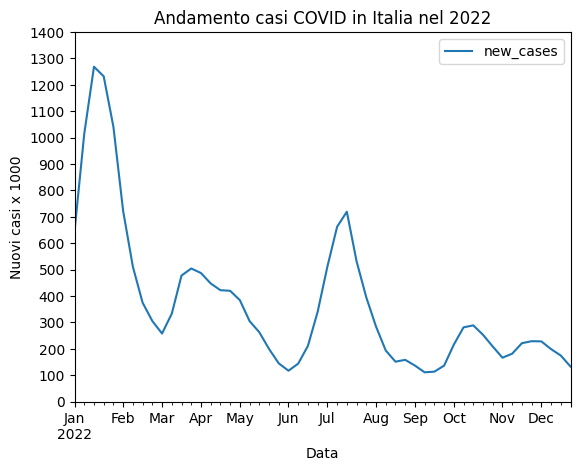

In [6]:
#3. Selezionare i dati relativi all'Italia nel 2022 e mostrare con dei grafici adeguati:
#	a. l'evoluzione del casi totali dall'inizio alla fine dell'anno
#	b. il numero di nuovi casi rispetto alla data
#		k. poiché i nuovi casi vengono registrati settimanalmente, filtrare via i dati che non hanno misurazioni





# creazione di un dataframe con i dati filtrati per nazione Italia e per anno 2022

FiltroItalia = df.location =='Italy'
FiltroData = df['date'].dt.year == 2022
FiltroNewCases= df.new_cases != 0
Italia2022 = df.loc[(FiltroItalia & FiltroData & FiltroNewCases)]


Italia2022 = Italia2022[['iso_code','continent','location','date','total_cases','new_cases']]


#definisco l'asse x e y del grafico
Italia2022.plot(y='new_cases', x='date', kind='line')

#definisco le etichette degli assi x e y e il titolo del grafico
plt.xlabel('Data')
plt.ylabel('Nuovi casi x 1000')
plt.title('Andamento casi COVID in Italia nel 2022')

#definisco una scala dei valori dell'asse y
yticks = list(range(0,1500000,100000))
plt.yticks(ticks=yticks, labels = [str(round(y/1000)) for y in yticks])

#visualizzazione grafico
plt.show()

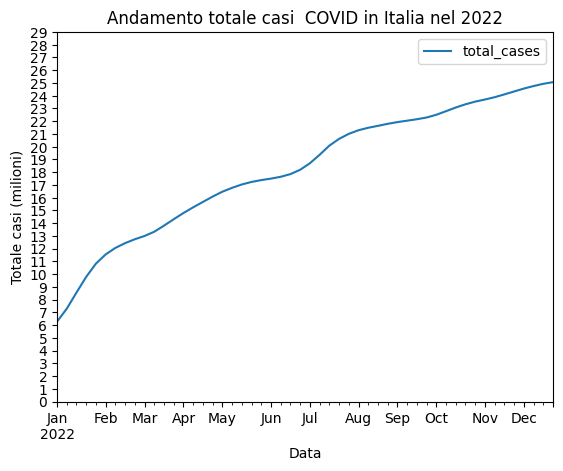

In [7]:
#a. l'evoluzione del casi totali dall'inizio alla fine dell'anno


#Utilizzando sempre lo stesso dataframe filtrato precedentemente elaboro il grafico sul valore dei casi totali
Italia2022.plot(y='total_cases', x='date', kind='line')
plt.xlabel('Data')
plt.ylabel('Totale casi (milioni)')
plt.title('Andamento totale casi  COVID in Italia nel 2022')
yticks = list(range(0,30000000,1000000))
plt.yticks(ticks=yticks, labels = [str(round(y/1000000)) for y in yticks])
plt.show()


<Axes: xlabel='location', ylabel='icu_patients'>

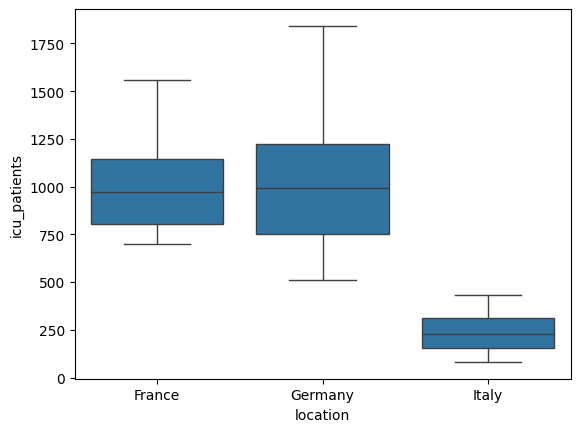

In [8]:
#4. Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti 
#   in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso)
#	a. scrivere un breve commento a riguardo



import matplotlib.pyplot as plt
import seaborn as sb


FiltroNazione = df.location.isin(['Italy','France','Germany'])
FiltroData = df['date'].between('2022-05-01', '2023-04-30')
TerapiaIntensiva = df.loc[(FiltroNazione & FiltroData )]
TerapiaIntensiva = TerapiaIntensiva[['iso_code','continent','location','date','icu_patients']]
TerapiaIntensiva


sb.boxplot(data=TerapiaIntensiva, x='location', y='icu_patients')

# Il grafico rconfronta visivamente la situazione dei pazienti ricoverati in terapia intensiva nel periodo che va dal 01/05/2022 al 30/04/2023
# Da questo grafico possiamo vedere che:
#   In Francia:
#       -   Il numero di pazienti ricoverati in terapia intensiva varia approssimativamente tra 700 e 1500.
#       -   La mediana si trova intorno ai 1000 pazienti.
#
#   In Germania:
#       -   Il numero di pazienti varia da circa 500 a 1750.
#       -   La mediana è intorno ai 1000 pazienti.
#       -   La Germania mostra il numero più alto di pazienti in terapia intensiva tra le tre nazioni considerate.
#
#   In Italia:
#       -   Il numero di pazienti varia tra circa 50 e 350.
#       -   La mediana è intorno ai 250 pazienti.
#       -   L'Italia ha avuto il numero più basso di pazienti ricoverati in terapia intensiva (nel periodo analizzato), 
#           il che potrebbe riflettere una gestione più efficace della pandemia o diversi livelli di severità dei casi.
#
#   Conclusioni:
#   Differenze Nazionali:   Il grafico evidenzia chiaramente le differenze nel numero di pazienti in terapia intensiva tra Francia, 
#                           Germania e Italia, con la Germania che ha avuto il numero più alto, seguita dalla Francia, mentre l'Italia 
#                           ha avuto il numero più basso.
#   Impatto della Pandemia: Queste differenze possono essere attribuite a vari fattori, inclusi differenti tassi di infezione, efficacia 
#                           delle misure sanitarie adottate e capacità dei sistemi sanitari nazionali.


In [9]:
#5. Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023: 
#	a. mostrare la somma dei pazienti ospitalizzati per ognuna 
#	b. se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno

# ************************************************************************************************************************************************
# NOTE SULLO SVOLGIMENTO: 
# Nel dataset il campo che mi permette di calcolare i totali dei nuovi ospitalizzati è 'weekly_hosp_admissions', in questo campo vengono riportati i nuovi 
# ospitalizzati conteggiati partendo dalla data di riferimento e i 6 giorni antecedenti. Non essendo un dato giornaliero ma settimanale ho deciso di utilizzare  
# la domenica come giorno di riferimento e di sommare i valori raggruppandoli per nazione.


# Da una verifica sul dataset ho visto che i conteggi delle nuove ospedalizzazioni sono incompete per tutti i paesi tranne l'Italia.
# Con le informazioni persenti nel dataset non rietngo possibile ricavare i dati mancanti.
# Per avere qunindi un dato omogeneo ho determinato l'ultima data in cui troviamo dati aggiornati per tutte le nazioni (31/03/2023 - Francia)
# Ho, quindi, estrapolato i totali dei pazienti ospitalizzati a quella data.
# ************************************************************************************************************************************************



# Estraopilazione dati dal dataset
FiltroNazione = df.location.isin(['Italy','France','Germany','Spain'])
FiltroData = df['date'].between('2023-01-01', '2023-12-31')
Ospedalizzazioni2023 = df.loc[(FiltroNazione & FiltroData )]
Ospedalizzazioni2023 = Ospedalizzazioni2023[['iso_code', 'continent', 'location','date', 'hosp_patients','weekly_hosp_admissions']]

# Pulizia del datafrme dalle righe con valori nulli che non mi servono ed estrapolazione dei soli totali della domenica 
# e creazione di un dataframe con i totali complessivi per ogni nazione
FiltroNotNull = df['weekly_hosp_admissions'].notnull()
Ospedalizzazioni2023 = Ospedalizzazioni2023.loc[(FiltroNotNull)]
Ospedalizzazioni2023['giorno'] = Ospedalizzazioni2023['date'].dt.day_name()
Ospedalizzazioni2023=Ospedalizzazioni2023.loc[Ospedalizzazioni2023.giorno == ('Sunday')]
TotaleOspedalizzazioni2023 = Ospedalizzazioni2023.groupby(['location'] )['weekly_hosp_admissions'].sum().dropna()

# Creazione di una lista con le ultime date in cui sono state fatte le rilevaioni nelle singole nazioni
FiltroMaxData = Ospedalizzazioni2023.groupby(['location'])['date'].max()
FiltroMaxData = FiltroMaxData.sort_values()
FiltroMaxData

# Dalla lista delle date etrapolo la minore che uso come filtro per avere i totali omogenei per tutte le nazioni
DataMin = FiltroMaxData.min()

# Creazione di un dataframe con i totali parziali alla data del 26/03/23
Filtro2 = Ospedalizzazioni2023['date'] <= DataMin
OspedalizzazioniParziali2023 = Ospedalizzazioni2023.loc[(Filtro2)]
OspedalizzazioniParziali2023 = OspedalizzazioniParziali2023.groupby(['location'] )['weekly_hosp_admissions'].sum().dropna()

# Creazione di un dataframe di riepilogo in cui inserisco i totali parziali al 26/03/23 per tutte le nazioni e i totali complessivi di ogni nazione alla data di rilevazione
RiepilogoOspedalizzazioni2023 = pd.DataFrame({
                                'Nazione' : OspedalizzazioniParziali2023.index,
                                'xx':OspedalizzazioniParziali2023,
                                'Totali alla data' :TotaleOspedalizzazioni2023,
                                'Data': FiltroMaxData,})

NewName = f'Totali al {DataMin.date()}'
RiepilogoOspedalizzazioni2023.rename(columns={'xx': NewName}, inplace=True)


# Visualizzazione dati
RiepilogoOspedalizzazioni2023







,Nazione,Totali al 2023-03-26,Totali alla data,Data
location,,,,
France,France,"41,250.00","41,250.00",2023-03-26
Germany,Germany,"102,928.00","132,609.00",2023-06-25
Italy,Italy,"25,678.00","87,533.00",2023-12-31
Spain,Spain,"24,272.00","44,718.00",2023-06-11


In [10]:
# Analisi aggiuntiva rispetto alla traccia sul 2022, metto a confronto i dati dei singoli stati europei con i valori totali mondiali


# Calcolo totale casi in Italia nel 2022
FiltroItalia = df.location =='Italy'
FiltroData = df['date'].between('2022-01-01', '2022-12-31')
Italia2022 = df.loc[(FiltroItalia & FiltroData)]
CasiItalia2022 = Italia2022['total_cases'].max()

# Calcolo totale casi nel 2022 per singfolo stato europeo
FiltroEuropa = df.continent =='Europe'
Europa2022 = df.loc[(FiltroEuropa & FiltroData)]
CasiEuropa2022= Europa2022.groupby('location')['total_cases'].max().dropna()

# Calcolo totale casi 2022 nel mondo
FiltroMondo = df.location == 'World'
Mondo2022 = df.loc[(FiltroMondo & FiltroData)]
CasiMondo2022 = Mondo2022['total_cases'].max()

# Calcolo percentuali incidenza 2022 dei singoli stati europei rispetto al totale mondiale
PercCasiEurWrl2022 = CasiEuropa2022/ CasiMondo2022 *100

# Calcolo percentuali indicenza 2022 dei singoli stati europi sul totale europa 2022
PercCasiEurEur2022 = CasiEuropa2022/ CasiEuropa2022.sum() * 100

# Unione delle serie in un unico dataframe
Riepilogo2022 = pd.DataFrame({
                'Nazione' :CasiEuropa2022.index,
                'Totale casi 2022':CasiEuropa2022,
                'Perc su totale Mondo 2022':PercCasiEurWrl2022,
                'Perc. su totel Europa 2022': PercCasiEurEur2022})
Riepilogo2022.index.name = 'Nazione'




# Visualizzazione dati

print('Totale casi nel mondo nel 2022:      ', '{:,.2f}'.format(CasiMondo2022))
print('Totale casi in Europa nel 2022:      ', '{:,.2f}'.format(CasiEuropa2022.sum()))
print('Totale casi in Italia nel 2022:      ', '{:,.2f}'.format(CasiItalia2022))
print("Percentuale di casi in Italia rispetto al totale globale: ", (CasiItalia2022/CasiMondo2022*100) )
Riepilogo2022


Totale casi nel mondo nel 2022:       704,630,839.00
Totale casi in Europa nel 2022:       242,057,677.00
Totale casi in Italia nel 2022:       25,060,503.00
Percentuale di casi in Italia rispetto al totale globale:  3.556543598853186


,Nazione,Totale casi 2022,Perc su totale Mondo 2022,Perc. su totel Europa 2022
Nazione,,,,
Albania,Albania,"332,670.00",0.05,0.14
Andorra,Andorra,"47,686.00",0.01,0.02
Austria,Austria,"5,678,345.00",0.81,2.35
Belarus,Belarus,"994,037.00",0.14,0.41
Belgium,Belgium,"4,679,472.00",0.66,1.93
Bosnia and Herzegovina,Bosnia and Herzegovina,"400,960.00",0.06,0.17
Bulgaria,Bulgaria,"1,280,617.00",0.18,0.53
Croatia,Croatia,"1,261,766.00",0.18,0.52
Cyprus,Cyprus,"628,509.00",0.09,0.26
